In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import glob
%matplotlib inline

<Figure size 1800x360 with 0 Axes>

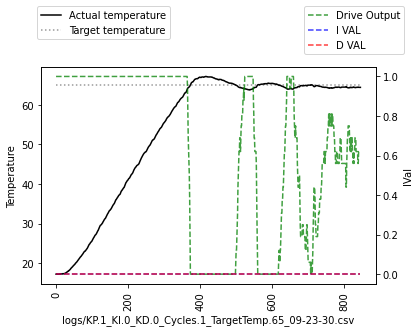

<Figure size 1800x360 with 0 Axes>

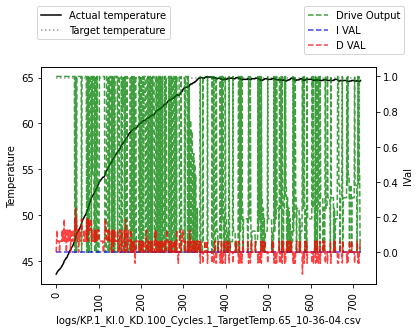

In [25]:
files = glob.glob("logs/*.csv")
for file in files:
    if "Cycles.1" in file and "Temp.65" in file:
        data = pd.read_csv(file)
        data.replace("False", "0", inplace=True)
        data.replace("True", "1", inplace=True)
        data.set_index("stepcount", inplace=True)
        plt.figure(figsize=(25,5))
        fig, ax = plt.subplots()
        ax.plot(data.index, data['current_temp'], c='black', label="Actual temperature")
        ax.plot(data.index, data['target_temp'], c='black', label="Target temperature", linestyle=':', alpha=0.4)
        ax.set_xlabel(file)
        ax.set_ylabel("Temperature")
        ax.tick_params(axis='x', labelrotation = 90)
        plt.legend(bbox_to_anchor=(0.4,1.3))
        ax2 = ax.twinx()
        ax2.plot(data.index, data['outcome'], c='g', label="Drive Output", alpha=0.75, linestyle='--')
        ax2.plot(data.index, data['Ival'], c='b', label="I VAL", alpha=0.75, linestyle='--')
        ax2.plot(data.index, data['Dval'], c='r', label="D VAL", alpha=0.75, linestyle='--')
        ax2.set_ylabel("IVal")
        plt.legend(bbox_to_anchor=(1.1,1.3))
        plt.show()